Initial attempt at saving the image from ChromeDino so that we can then try and make use of the game environment

In [85]:
import re
import time
import requests
from bs4 import BeautifulSoup
from tqdm import tqdm, tnrange
import numpy as np
from collections import defaultdict,Counter
from scipy.misc import imread, imsave

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException

import pandas as pd
import base64

from PIL import Image
import io



from matplotlib import pyplot as plt, rcParams, cm
%matplotlib inline
rcParams["figure.figsize"] = (16,12)    # Use this line to increase your figure size (optional).

Stack overflow link talking about saving images in canvas: https://stackoverflow.com/questions/44485616/web-scraping-image-inside-canvas

# Option 2
Force Selenium to execute JavaScript to just pull the information out of the canvas tag.

In [102]:
js_call = "return document.getElementsByClassName('runner-canvas')[0].toDataURL('image/png').substring(21);"
url = "https://chromedino.com/"
browser = webdriver.Chrome()
images = []
try:
    browser.get(url)
    body = browser.find_element_by_id('t')
    while True:
        wait_time = np.random.uniform(0,1)
        body.send_keys(Keys.ARROW_UP)
        time.sleep(wait_time)
        b64_image = browser.execute_script(js_call)
        image = base64.b64decode(b64_image)
        buf = io.BytesIO(image)
        img = Image.open(buf).convert('LA')
        images.append(img)
except Exception as e:
    print("Errored out at step 1", e)
finally:
    browser.close() #make sure we close it when we are finished.

ConnectionResetError: [Errno 54] Connection reset by peer

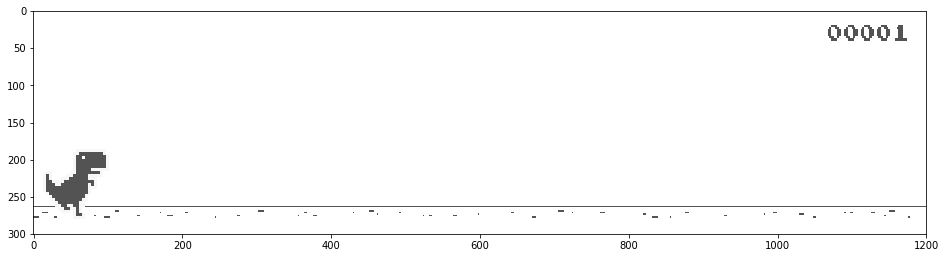

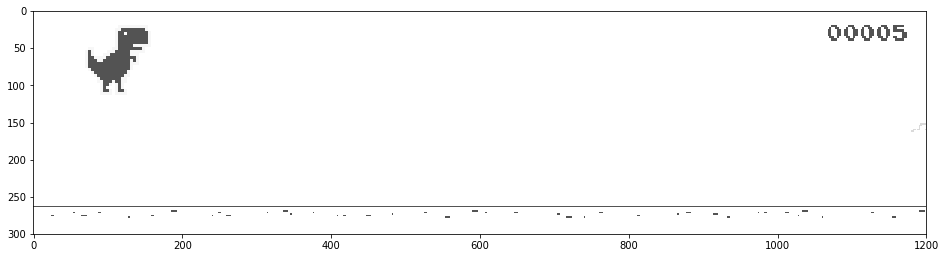

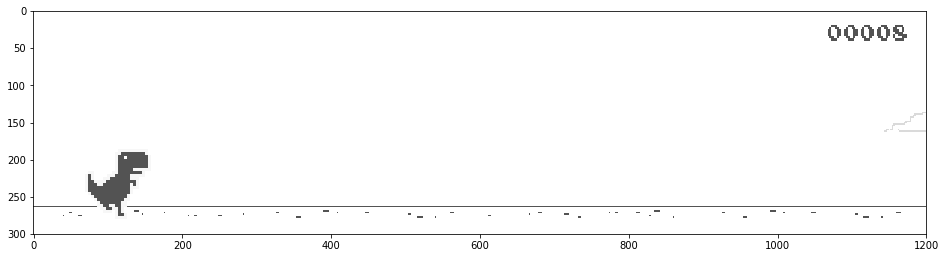

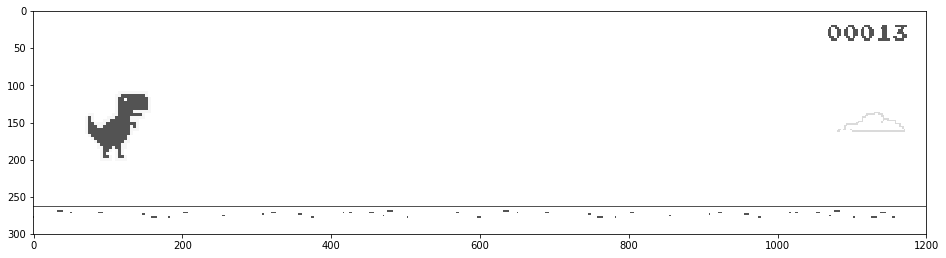

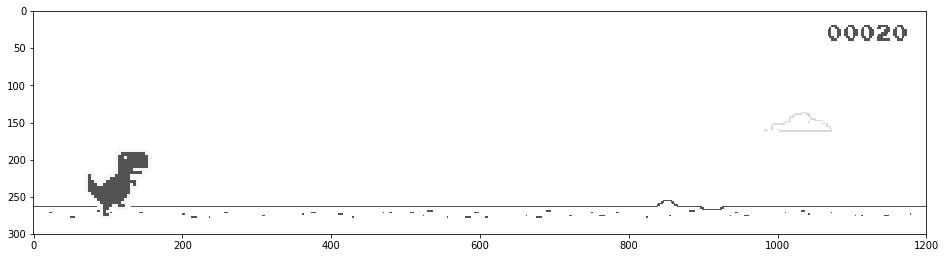

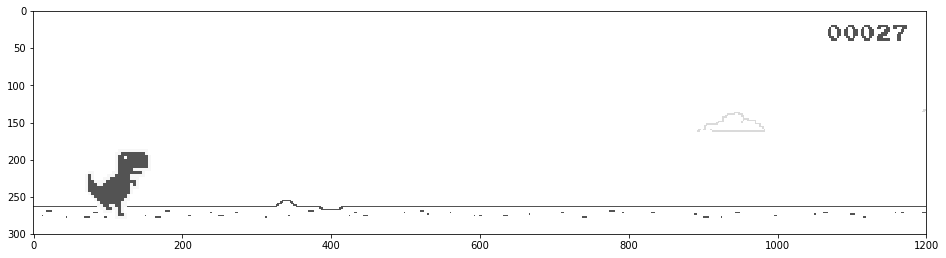

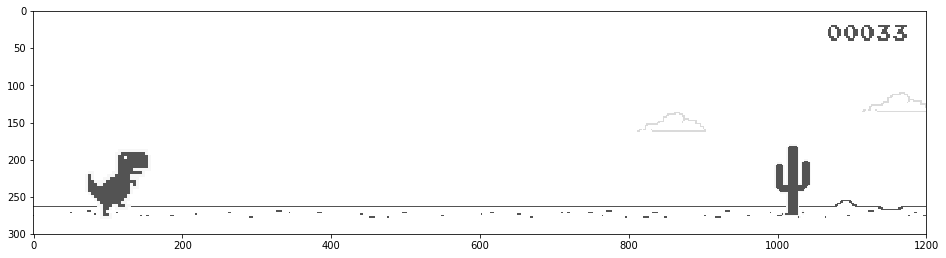

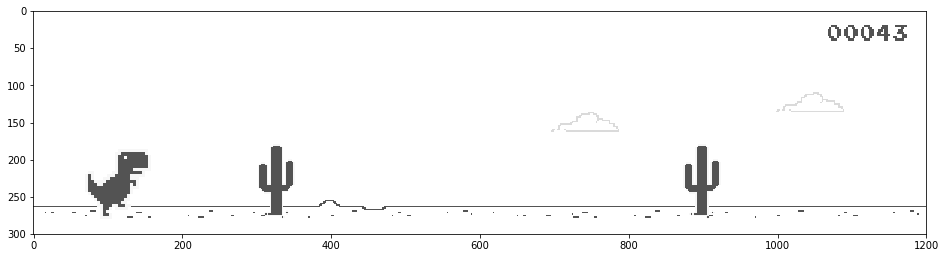

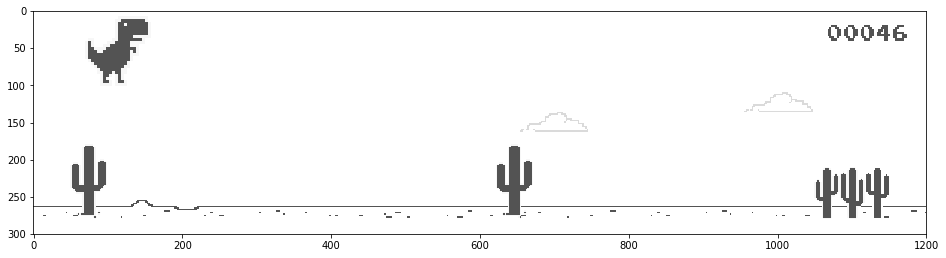

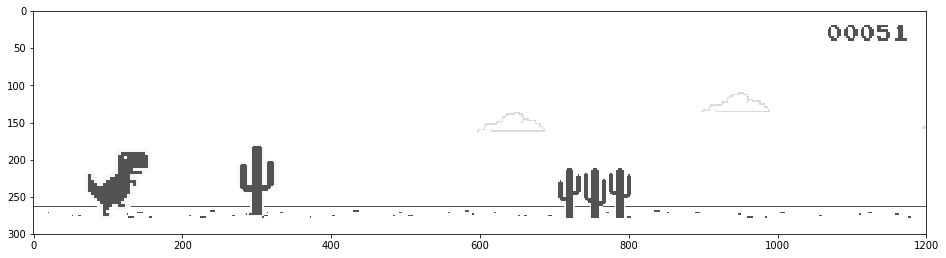

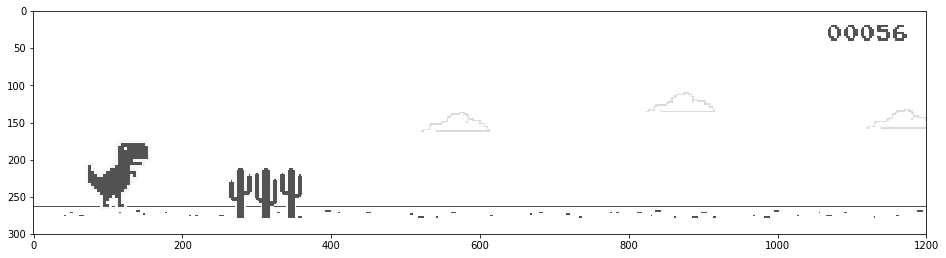

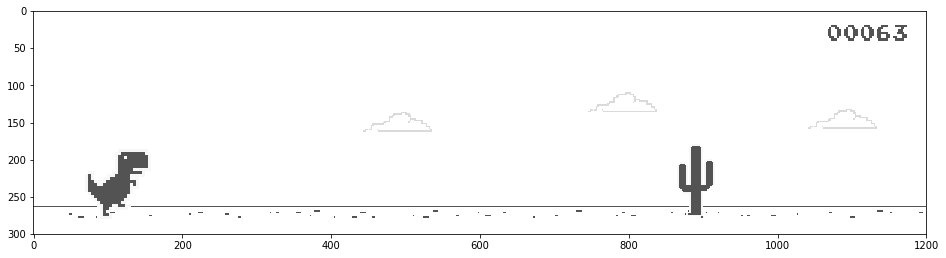

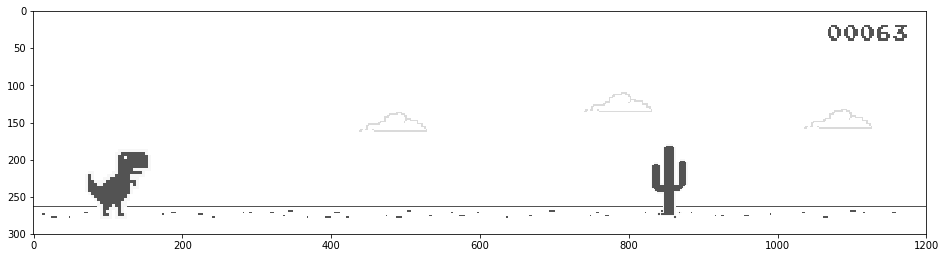

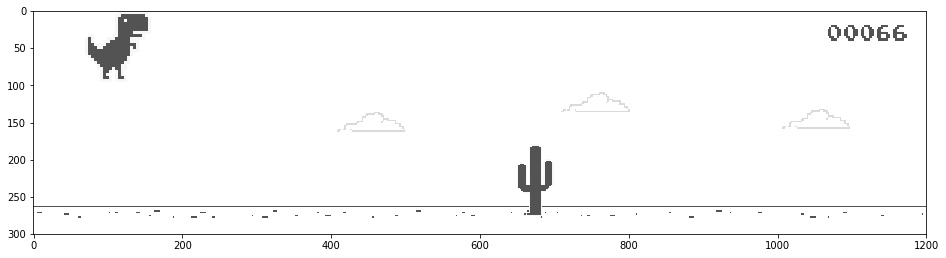

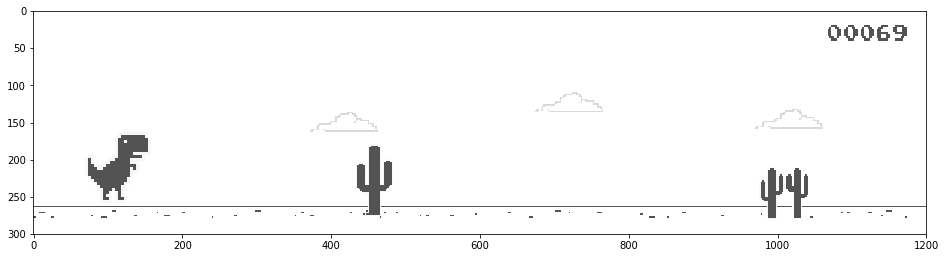

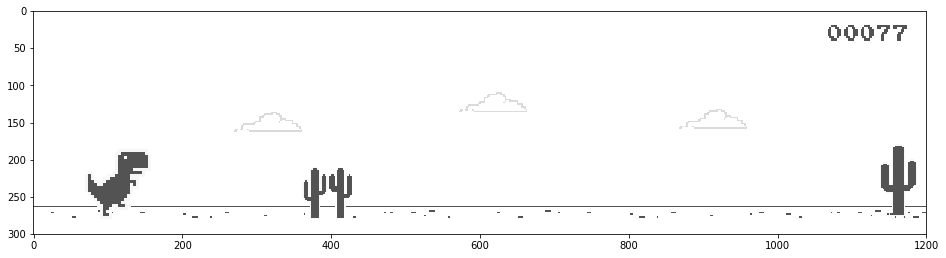

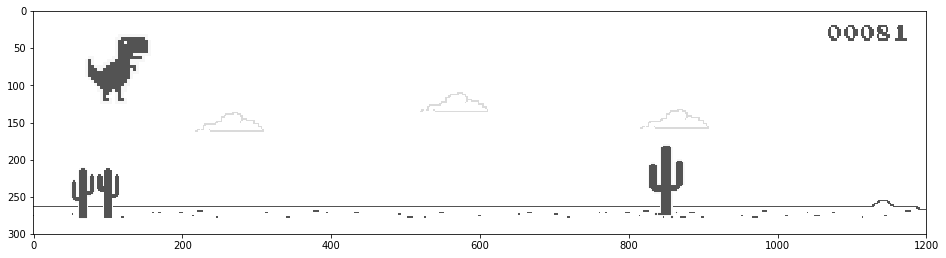

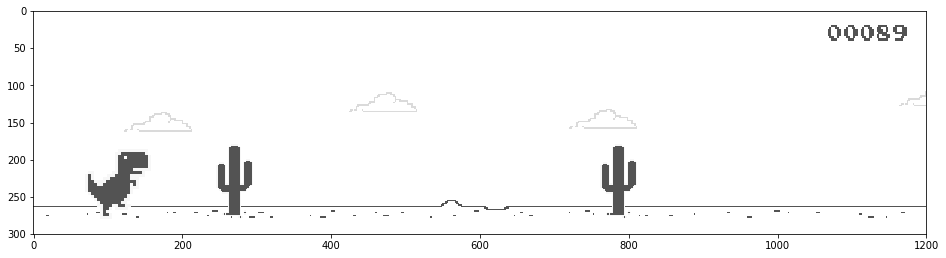

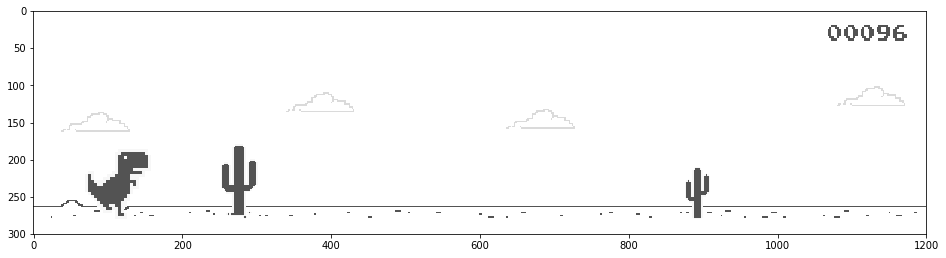

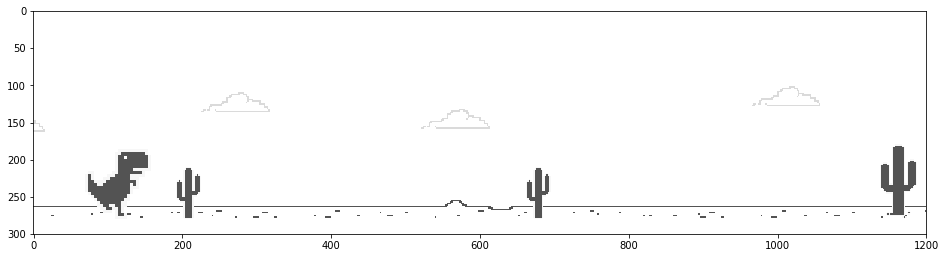

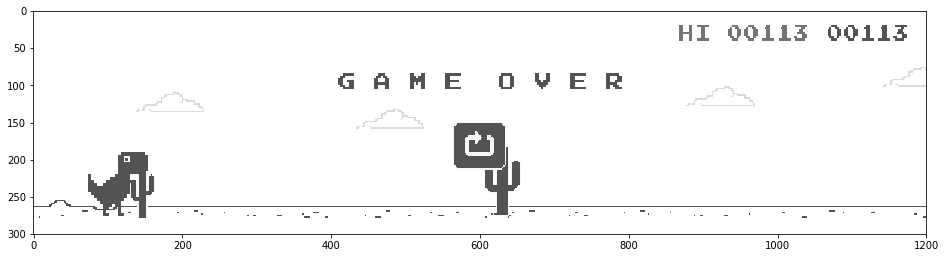

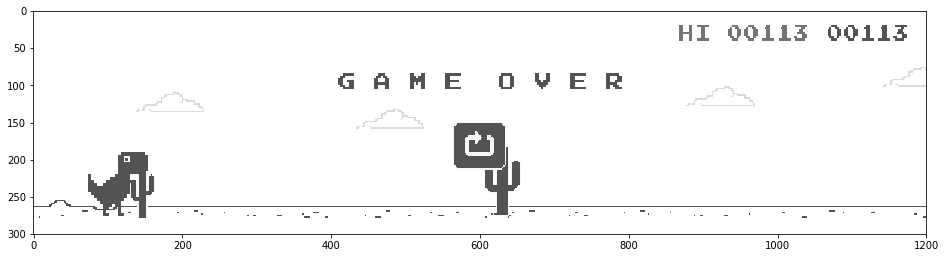

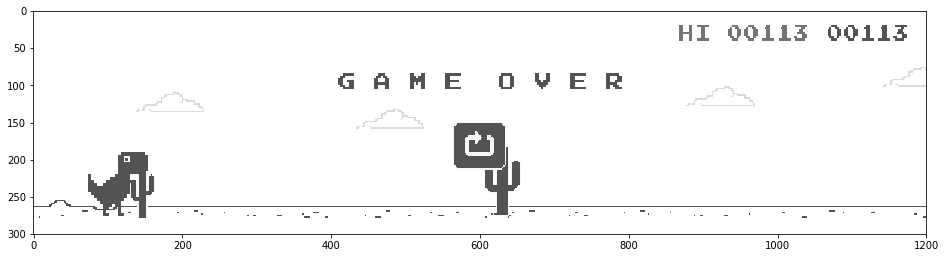

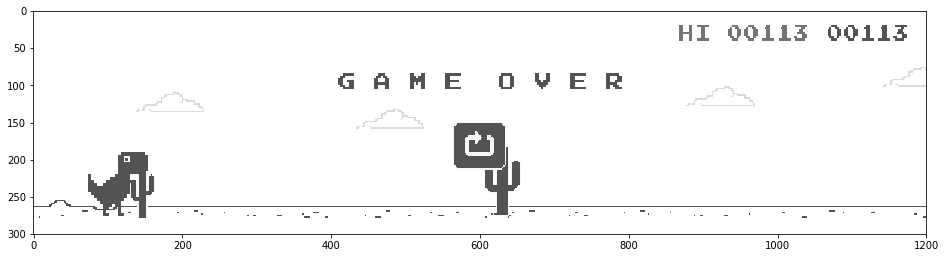

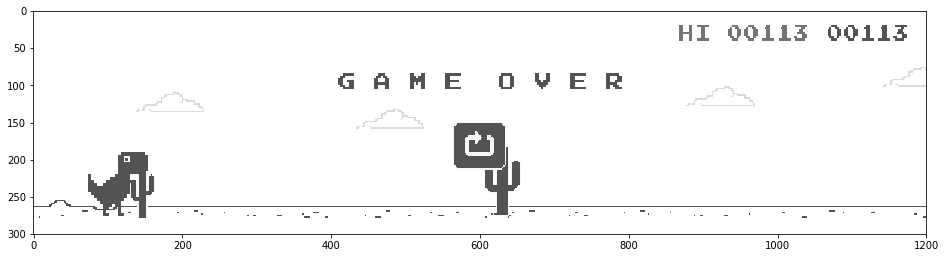

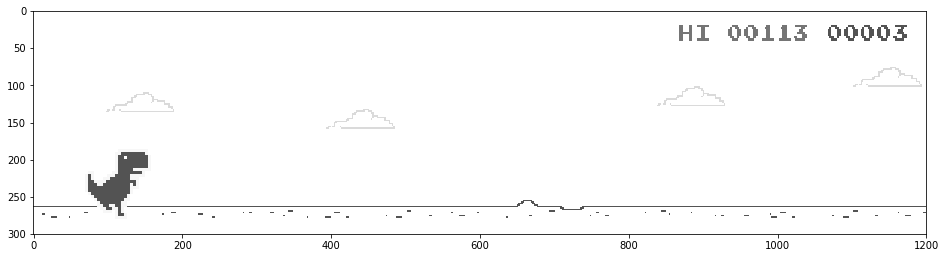

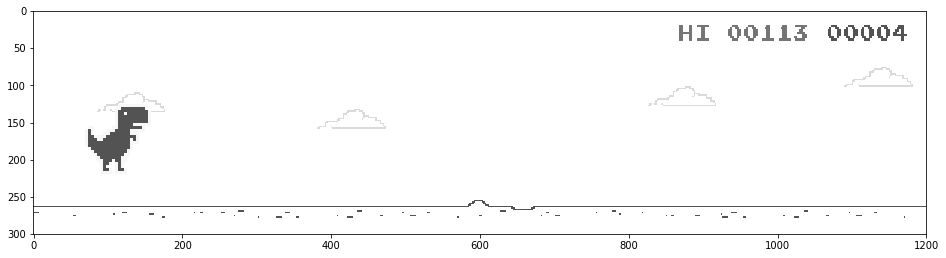

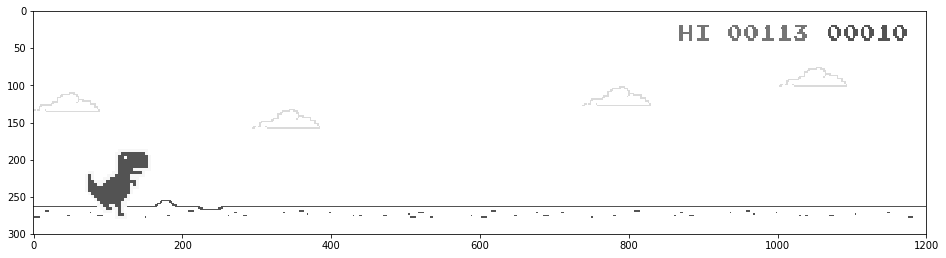

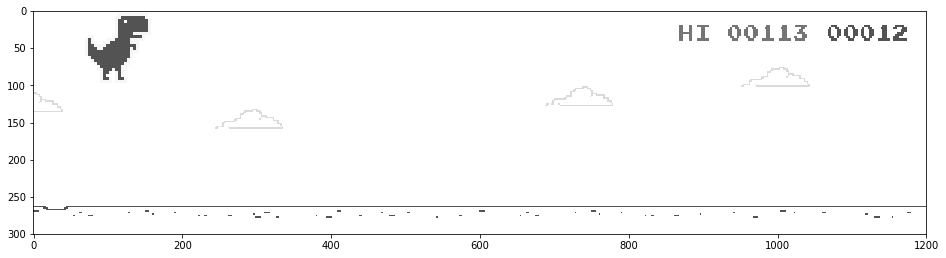

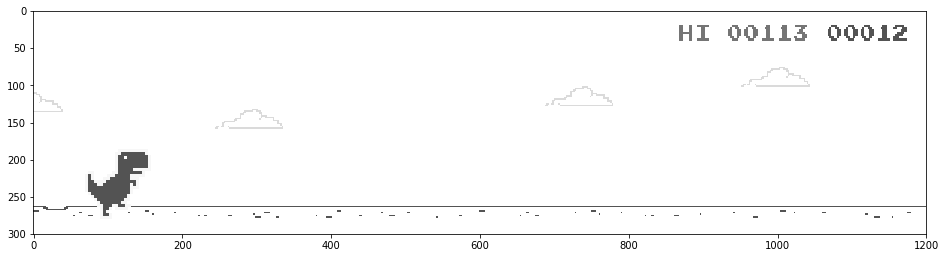

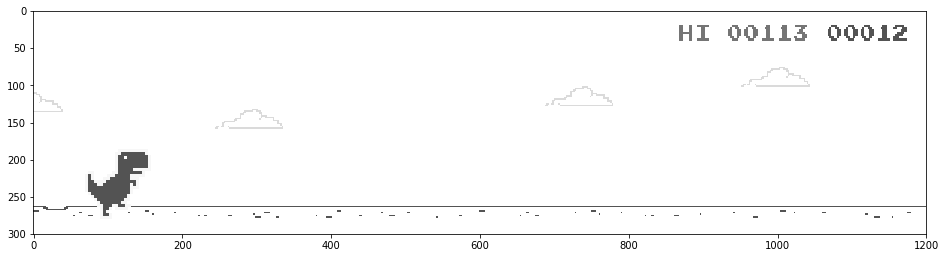

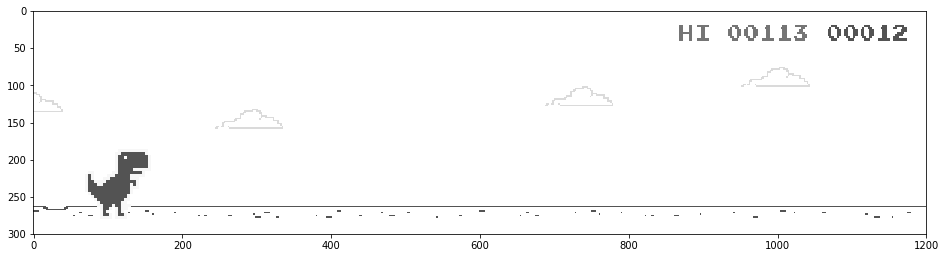

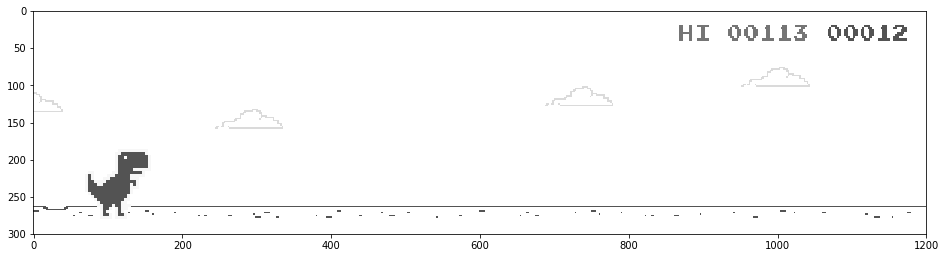

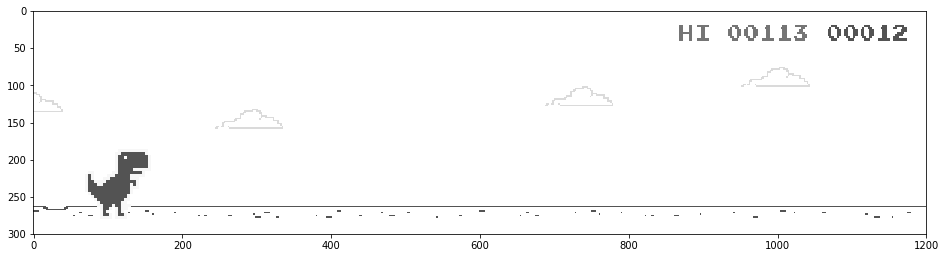

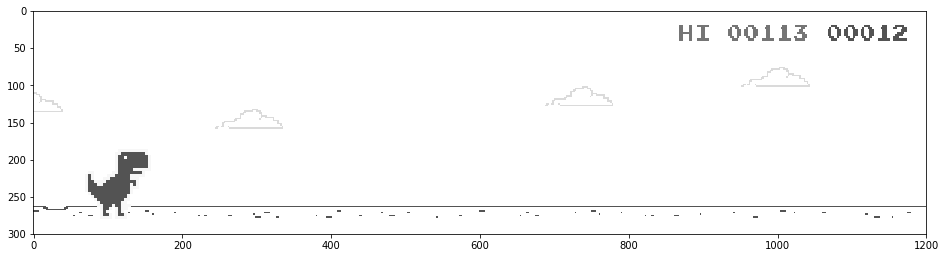

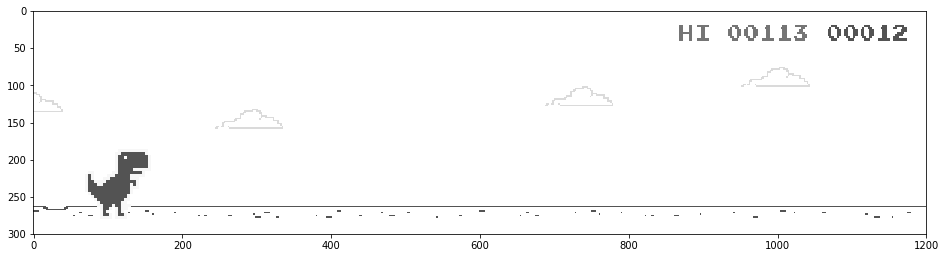

In [103]:
for i in images:
    plt.imshow(i); plt.show()

In [65]:
a = imread("game_board2.png", flatten=True) *1/255
n,m = a.shape
plt.imshow(image, cmap=cm.gray); plt.show()
plt.imshow(a[:,:n//2], cmap=cm.gray); plt.show()

ValueError: embedded null byte